In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sympy import Symbol, Matrix
from sympy.interactive import printing
printing.init_printing()
import pandas as pd

In [ ]:
#Initialising the filter
x = np.matrix([[0.1, 0.0, 0.1, 0.0, 0.1, 0.0]]).T
print(x, x.shape)
n=x.size # States
# plt.scatter(float(x[0]),float(x[1]), s=100)
# plt.title('Initial Location')

[[0.1]
 [0. ]
 [0.1]
 [0. ]
 [0.1]
 [0. ]] (6, 1)


In [ ]:
#P Matrix initialisation
P = np.diag([1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
print(P, P.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]] (6, 6)


In [ ]:
#Time step between filter steps
dt = 0.1 
#System Matrix inititalisation - the initialisation is used 
#using first term of taylor expansion
A = np.matrix([[1.0, 0.0, dt, 0.0, 1/2.0*dt**2, 0.0],
              [0.0, 1.0, 0.0, dt, 0.0, 1/2.0*dt**2],
              [0.0, 0.0, 1.0, 0.0, dt, 0.0],
              [0.0, 0.0, 0.0, 1.0, 0.0, dt],
              [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
print(A, A.shape)

[[1.    0.    0.1   0.    0.005 0.   ]
 [0.    1.    0.    0.1   0.    0.005]
 [0.    0.    1.    0.    0.1   0.   ]
 [0.    0.    0.    1.    0.    0.1  ]
 [0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    1.   ]] (6, 6)


In [ ]:
H = np.matrix([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
               [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
              [0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
print(H, H.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]] (4, 6)


In [ ]:
#Q Matrix for discrete white noise
dts = Symbol('\Delta t')
Qs = Matrix([[0.5*dts**2],[0.5*dts**2],[dts],[dts],[1.0],[1.0]])
Qs*Qs.T

In [ ]:
sa = 0.001
G = np.matrix([[1/2.0*dt**2],
               [1/2.0*dt**2],
               [dt],
               [dt],
               [1.0],
               [1.0]])
#Based on Text Book series on Kalman Filter
Q = G*G.T*sa**2

print(Q, Q.shape)

[[2.5e-11 2.5e-11 5.0e-10 5.0e-10 5.0e-09 5.0e-09]
 [2.5e-11 2.5e-11 5.0e-10 5.0e-10 5.0e-09 5.0e-09]
 [5.0e-10 5.0e-10 1.0e-08 1.0e-08 1.0e-07 1.0e-07]
 [5.0e-10 5.0e-10 1.0e-08 1.0e-08 1.0e-07 1.0e-07]
 [5.0e-09 5.0e-09 1.0e-07 1.0e-07 1.0e-06 1.0e-06]
 [5.0e-09 5.0e-09 1.0e-07 1.0e-07 1.0e-06 1.0e-06]] (6, 6)


In [ ]:
I = np.eye(n)
print(I, I.shape)

[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]] (6, 6)


In [ ]:
ra = 10.0**(-1)   # Noise of Acceleration Measurement
rp = 10.0**(-1)  # Noise of Gyro Measurement
R = np.matrix([[rp, 0.0, 0.0, 0.0],
               [0.0, rp, 0.0, 0.0],
               [0.0, 0.0, ra, 0.0],
               [0.0, 0.0, 0.0, ra]])
print(R, R.shape)

**Importing of Data**

In [ ]:
m = 1629 # all samples considered

sp= 0.1 
px= 0.0
py= 0.0 

dataFrame = pd.read_csv('/content/drive/MyDrive/data_OP_part.csv')
accelerometer_data = dataFrame[['ax','ay','az']].dropna()
gyro_data = dataFrame[['gx','gy','gz']].dropna()
# gyro_data_y = dataFrame[['gy']].dropna()
# gyro_data_z = dataFrame[['gz']].dropna()

accel_data = np.asarray(accelerometer_data)
# accel_data_y = np.asarray(accelerometer_data_y)
# accel_data_z = np.asarray(accelerometer_data_z)

gyro_data = np.asarray(gyro_data)
# gyro_data_y = np.asarray(gyro_data_y)
# gyro_data_z = np.asarray(gyro_data_z)

# mpx = np.array(px+sp*np.random.randn(m))
# mpy = np.array(py+sp*np.random.randn(m))

In [ ]:
GPS=np.ndarray(m,dtype='bool')
GPS[0]=True
# Less new position updates
for i in range(1,m):
    if i%10==0:
        GPS[i]=True
    else:
        mpx[i]=mpx[i-1]
        mpy[i]=mpy[i-1]
        GPS[i]=False

In [ ]:
sa= 0.1 
ax= 0.0 
ay= 0.0 

mx = np.array(ax+sa*np.random.randn(m))
my = np.array(ay+sa*np.random.randn(m))

In [ ]:
measurements = np.vstack((mpx,mpy,mx,my))
print(measurements.shape)

(4, 700)


In [ ]:
measurements

array([[ 0.1035967 ,  0.1035967 ,  0.1035967 , ...,  1.5610447 ,
         1.5610447 ,  1.5610447 ],
       [ 0.50199405,  0.50199405,  0.50199405, ...,  0.26269273,
         0.26269273,  0.26269273],
       [-0.11268779, -0.01137233,  0.18515305, ...,  0.20174549,
         0.03072785,  0.01611091],
       [ 0.12503311, -0.01323433,  0.06389468, ..., -0.02437638,
         0.11435328, -0.04341175]])

Multiple Iterations of Kalman Filter

In [ ]:
for kalman_filter in range(m):   
    x = A*x    
    P = A*P*A.T + Q  
    
    if GPS[kalman_filter]:        
        S = H*P*H.T + R
        K = (P*H.T) * np.linalg.pinv(S)        
        Z = measurements[:,kalman_filter].reshape(4,1)
        y = Z - (H*x) # Innovation or Residual
        x = x + (K*y)              
        P = (I - (K*H))*P

    savestates(x, Z, P, K) #Function to save values in the multiple iterations

In [ ]:
"""
xt - change in initialisation vector with time
yt- change in initialisation vector with time


Kx - Kalman Gain for Gyroscopic data in x
Ky - Kalman Gain for Gyroscopic data in y

kddx - Kalman Gain with acceleration x 
kddy - kalman Gain with Acceleration y 
kddz - Kalman Gain with Acceleration z
"""
xt = []
yt = []
dxt= []
dyt= []
ddxt=[]
ddyt=[]
Zx = []
Zy = []
Px = []
Py = []
Pdx= []
Pdy= []
Pddx=[]
Pddy=[]
Kx = []
Ky = []
Kdx= []
Kdy= []
Kddx=[]
Kddy=[]


def savestates(x, Z, P, K):
    xt.append(float(x[0]))
    yt.append(float(x[1]))
    dxt.append(float(x[2]))
    dyt.append(float(x[3]))
    ddxt.append(float(x[4]))
    ddyt.append(float(x[5]))
    Zx.append(float(Z[0]))
    Zy.append(float(Z[1]))
    Px.append(float(P[0,0]))
    Py.append(float(P[1,1]))
    Pdx.append(float(P[2,2]))
    Pdy.append(float(P[3,3]))
    Pddx.append(float(P[4,4]))
    Pddy.append(float(P[5,5]))
    Kx.append(float(K[0,0]))
    Ky.append(float(K[1,0]))
    Kdx.append(float(K[2,0]))
    Kdy.append(float(K[3,0]))
    Kddx.append(float(K[4,0]))
    Kddy.append(float(K[5,0]))

In [ ]:
print(Kddx)
print(Kddy)

[0.00040949960827625913, 0.00040949960827625913, 0.00040949960827625913, 0.00040949960827625913, 0.00040949960827625913, 0.00040949960827625913, 0.00040949960827625913, 0.00040949960827625913, 0.00040949960827625913, 0.00040949960827625913, 0.023473746827225698, 0.023473746827225698, 0.023473746827225698, 0.023473746827225698, 0.023473746827225698, 0.023473746827225698, 0.023473746827225698, 0.023473746827225698, 0.023473746827225698, 0.023473746827225698, 0.0657926443748292, 0.0657926443748292, 0.0657926443748292, 0.0657926443748292, 0.0657926443748292, 0.0657926443748292, 0.0657926443748292, 0.0657926443748292, 0.0657926443748292, 0.0657926443748292, 0.10389310826868361, 0.10389310826868361, 0.10389310826868361, 0.10389310826868361, 0.10389310826868361, 0.10389310826868361, 0.10389310826868361, 0.10389310826868361, 0.10389310826868361, 0.10389310826868361, 0.11624410784403406, 0.11624410784403406, 0.11624410784403406, 0.11624410784403406, 0.11624410784403406, 0.11624410784403406, 0.1

In [ ]:
def plot_K_ddxy():
    fig = plt.figure(figsize=(16,9))
    plt.plot(range(len(measurements[0])),Kddx, label='Kalman Gain for Acceleration X Direction')
    plt.plot(range(len(measurements[0])),Kddy, label='Kalman Gain for Acceleration Y direction')

    plt.xlabel('Filter Step')
    plt.ylabel('')
    plt.title('Kalman Gain (the lower, the more the measurement fullfill the prediction)')
    plt.legend(loc='best',prop={'size':18})

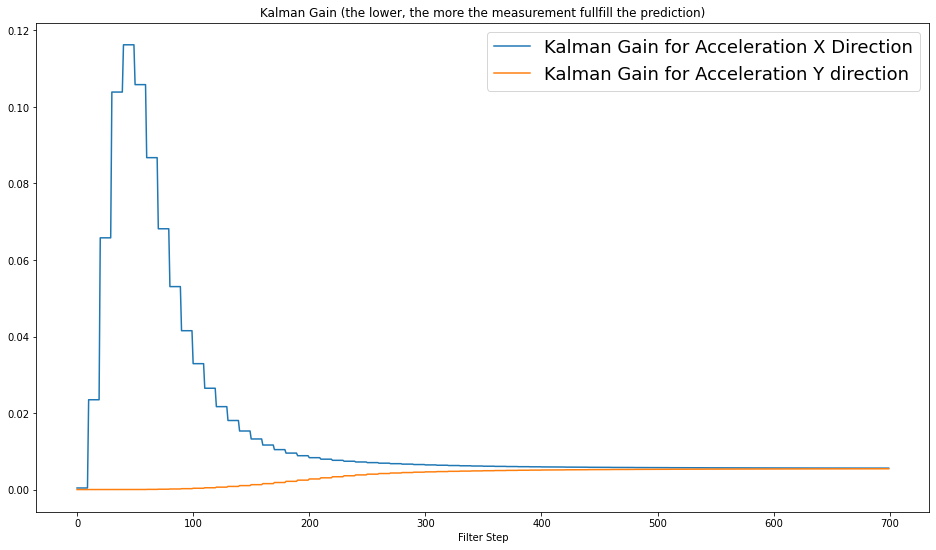

In [ ]:
plot_K_ddxy()

In [ ]:
def plot_angular_changes():
  fig = plt.figure(figsize=(16,9))
  dataframe = pd.read_csv('/content/drive/MyDrive/data_OP_part.csv')
  gyro_x = 
  gyro_x = data[[]]

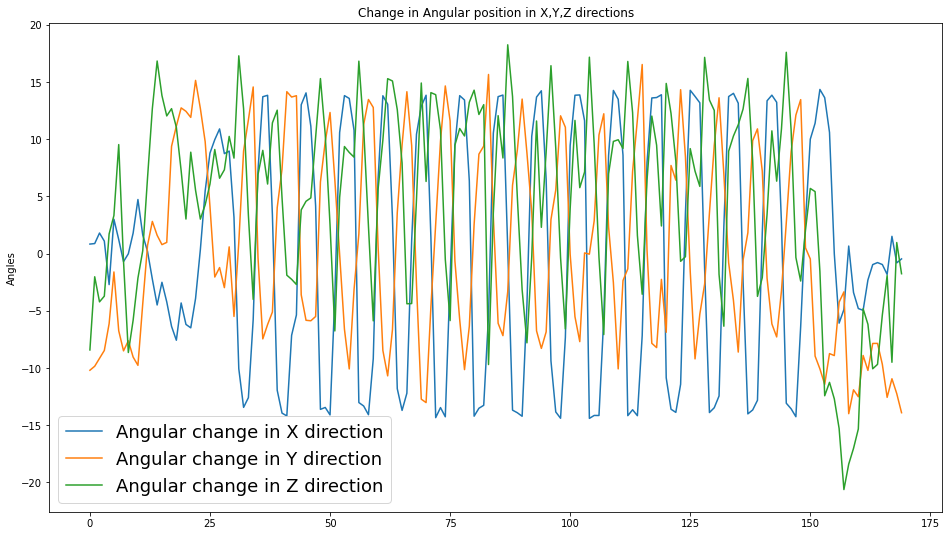

In [ ]:
fig = plt.figure(figsize=(16,9))
plt.plot(mx,label='Angular change in X direction')
plt.plot(my,label ='Angular change in Y direction')
plt.plot(mz,label ='Angular change in Z direction')

plt.xlabel('')
plt.ylabel('Angles')
plt.title('Change in Angular position in X,Y,Z directions')
plt.legend(loc='best',prop={'size':18})